In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [2]:
import glob
from glob import glob

In [3]:
glob('*.txt')

['codigo LMC_VI.txt',
 'LMC_IR.txt',
 'Tabla 1 IC1613.txt',
 'Tabla 4 Araucaria.txt']

In [4]:
# Define file path
file_path = "Tabla 4 Araucaria.txt"

# Read and process data
formatted_data = []
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 9:
            formatted_data.append(parts)
        elif len(parts) == 8:
            formatted_data.append(parts + [""])  # Add empty label if missing

# Create DataFrame
columns = ["ID", "P", "LogP", "J", "sigma_J", "K", "sigma_K", "Remarks", "Other"]
df = pd.DataFrame(formatted_data, columns=columns)

# Save to CSV
output_path = "tabla4_Araucaria.csv"
df.to_csv(output_path, index=False)

print(f"Formatted table saved to: {output_path}")


Formatted table saved to: tabla4_Araucaria.csv


In [4]:
glob('*.xlsx')

['IC1613 JK.xlsx', 'IC1613 VI.xlsx', 'IC1613_JK_si.xlsx', 'LMC JK.xlsx']

In [5]:
datos_originales = pd.read_excel('IC1613 JK.xlsx')
print(datos_originales)

          ID        P     LogP       J  sigma_J       K  sigma_K      Remarks
0   11446...  41.8700  1.62194  17.114    0.009  16.605    0.009          V20
1   10421...  29.1900  1.46529  19.694    0.060  19.029    0.071          PII
2    1987...  25.3980  1.40480  17.715    0.019  17.405    0.024          V11
3     736...  23.4690  1.37049  17.745    0.018  17.256    0.018           V2
4    7647...  16.4880  1.21716  18.056    0.020  17.688    0.027        Blend
5   13738...  16.4200  1.21537  18.590    0.043  18.066    0.028          V18
6     13682…  14.3170  1.15585  16.815    0.010  15.818    0.005  Not Chepeid
7   17473...  13.1540  1.11906  99.999    9.999  20.669    0.251          PII
8    7664...  10.4390  1.01866  18.996    0.030  18.555    0.048          V16
9     926...   9.4286  0.97445  19.109    0.028  18.736    0.036           V6
10    879...   9.2130  0.96440  19.156    0.046  18.689    0.054          V25
11    13808…   7.5720  0.87921  19.591    0.092  19.160    0.058

In [6]:
datos = datos_originales.drop([7,19,21,25,26,30,36,37])
datos

,ID,P,LogP,J,sigma_J,K,sigma_K,Remarks
0,11446...,41.8700,1.62194,17.114,0.009,16.605,0.009,V20
1,10421...,29.1900,1.46529,19.694,0.060,19.029,0.071,PII
2,1987...,25.3980,1.40480,17.715,0.019,17.405,0.024,V11
3,736...,23.4690,1.37049,17.745,0.018,17.256,0.018,V2
4,7647...,16.4880,1.21716,18.056,0.020,17.688,0.027,Blend
5,13738...,16.4200,1.21537,18.590,0.043,18.066,0.028,V18
6,13682…,14.3170,1.15585,16.815,0.010,15.818,0.005,Not Chepeid
8,7664...,10.4390,1.01866,18.996,0.030,18.555,0.048,V16
9,926...,9.4286,0.97445,19.109,0.028,18.736,0.036,V6
10,879...,9.2130,0.96440,19.156,0.046,18.689,0.054,V25


In [7]:
periodos = datos['P']
log_p = datos["LogP"]
mag_j = datos['J']
mag_k = datos['K']
len(mag_j)

31

Text(0.5, 1.0, 'J vs Log P para IC1613')

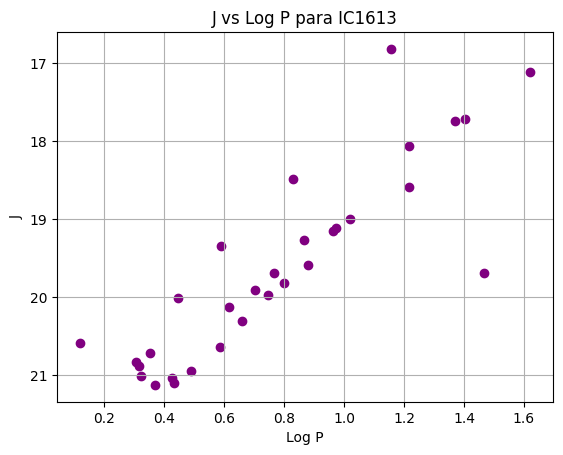

In [8]:
plt.scatter(log_p, mag_j, color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Log P')
plt.ylabel('J')
#plt.xlim(0,2.0)
#plt.ylim(25.0, 15)
plt.grid()
plt.title('J vs Log P para IC1613')

Slope (m): -2.6929 ± 0.2924
Intercept (b): 21.7122 ± 0.2530
R-squared: 0.7452


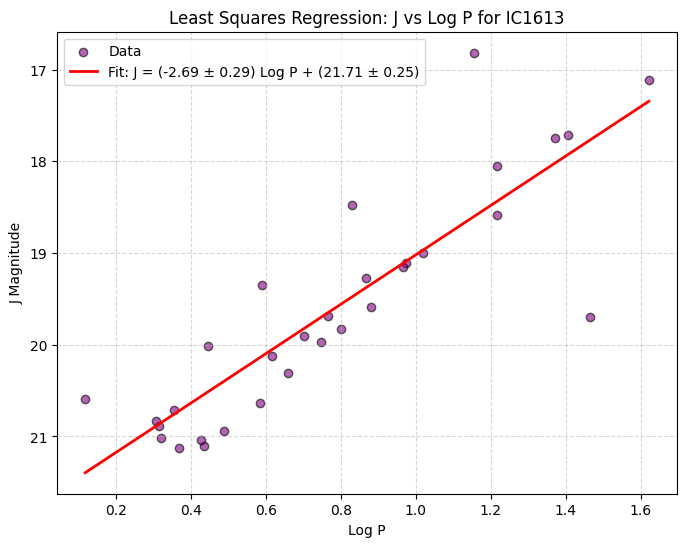

In [9]:
from scipy.stats import linregress
# Perform Least Squares Regression
slope, intercept, r_value, p_value, slope_err = linregress(log_p, mag_j)
intercept_err = slope_err * np.sqrt(np.sum(log_p**2) / len(log_p))  # Calculate error for intercept


# Print the results
print(f"Slope (m): {slope:.4f} ± {slope_err:.4f}")
print(f"Intercept (b): {intercept:.4f} ± {intercept_err:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Generate regression line
log_p_range = np.linspace(min(log_p), max(log_p), 100)
best_fit_line = slope * log_p_range + intercept

# Plot Data & Best-Fit Line
plt.figure(figsize=(8, 6))
plt.scatter(log_p, mag_j, color='purple', alpha=0.6, edgecolor='black', label="Data")
plt.plot(log_p_range, best_fit_line, color='red', linewidth=2, label=f"Fit: J = ({slope:.2f} ± {slope_err:.2f}) Log P + ({intercept:.2f} ± {intercept_err:.2f})")

plt.gca().invert_yaxis()  # Invert y-axis for magnitudes
plt.xlabel('Log P')
plt.ylabel('J Magnitude')
plt.grid(True, linestyle="--", alpha=0.5)
plt.title('Least Squares Regression: J vs Log P for IC1613')
plt.legend()

# Show the plot
plt.show()

Slope (m): -2.7313 ± 0.3291
Intercept (b): 21.2319 ± 0.2848
R-squared: 0.7037


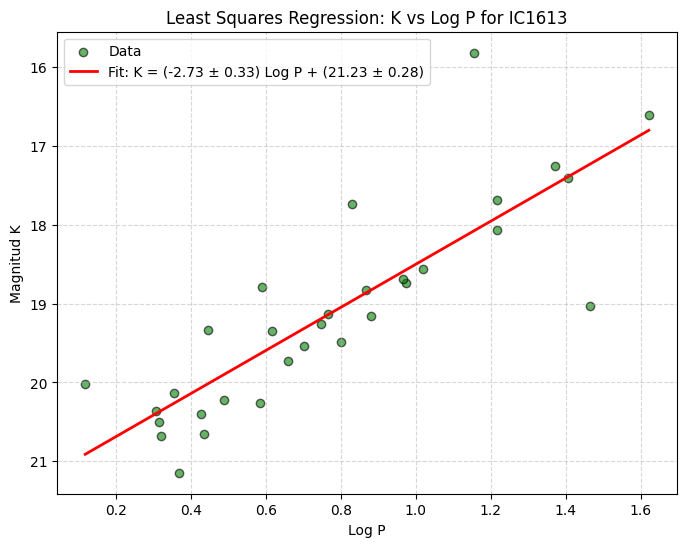

In [14]:
# Perform Least Squares Regression
slope, intercept, r_value, p_valuek, slope_err = linregress(log_p, mag_k)
intercept_err = slope_err * np.sqrt(np.sum(log_p**2) / len(log_p))  # Calculate error for intercept


# Print the results
print(f"Slope (m): {slope:.4f} ± {slope_err:.4f}")
print(f"Intercept (b): {intercept:.4f} ± {intercept_err:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Generate regression line
log_p_range = np.linspace(min(log_p), max(log_p), 100)
best_fit_line = slope * log_p_range + intercept

# Plot Data & Best-Fit Line
plt.figure(figsize=(8, 6))
plt.scatter(log_p, mag_k, color='green', alpha=0.6, edgecolor='black', label="Data")


plt.plot(log_p_range, best_fit_line, color='red', linewidth=2, label=f"Fit: K = ({slope:.2f} ± {slope_err:.2f}) Log P + ({intercept:.2f} ± {intercept_err:.2f})")

plt.gca().invert_yaxis()  # Invert y-axis for magnitudes
plt.xlabel('Log P')
plt.ylabel('Magnitud K')
plt.grid(True, linestyle="--", alpha=0.5)
plt.title('Least Squares Regression: K vs Log P for IC1613')
plt.legend()

# Show the plot
plt.show()

In [15]:
p_valuek

3.78750190443145e-09

In [11]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

In [12]:
# Perform regression analysis using statsmodels for heteroscedasticity tests
X = sm.add_constant(log_p)  # Add a constant for the intercept
model = sm.OLS(mag_j, X).fit()
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(bp_labels, bp_test))
print("Breusch-Pagan Test Results:")
print(bp_results)
# Perform the White test
white_test = het_white(model.resid, model.model.exog)
white_labels = ['Lagrange Multiplier statistic', 'LM-test p-value', 'F-statistic', 'F-test p-value']
white_results = dict(zip(white_labels, white_test))
print("White Test Results:")
print(white_results)

Breusch-Pagan Test Results:
{'LM Statistic': 2.749867464480031, 'LM-Test p-value': 0.0972624904004192, 'F-Statistic': 2.822859551885394, 'F-Test p-value': 0.10367345376083889}
White Test Results:
{'Lagrange Multiplier statistic': 3.479210635426531, 'LM-test p-value': 0.17558968908264655, 'F-statistic': 1.7698965044466612, 'F-test p-value': 0.18888118368556747}


In [13]:
# Perform regression analysis using statsmodels for heteroscedasticity tests
X = sm.add_constant(log_p)  # Add a constant for the intercept
model = sm.OLS(mag_k, X).fit()
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(bp_labels, bp_test))
print("Breusch-Pagan Test Results:")
print(bp_results)
# Perform the White test
white_test = het_white(model.resid, model.model.exog)
white_labels = ['Lagrange Multiplier statistic', 'LM-test p-value', 'F-statistic', 'F-test p-value']
white_results = dict(zip(white_labels, white_test))
print("White Test Results:")
print(white_results)

Breusch-Pagan Test Results:
{'LM Statistic': 1.6331726599794267, 'LM-Test p-value': 0.20126478611471016, 'F-Statistic': 1.6127723499385065, 'F-Test p-value': 0.21419830217089264}
White Test Results:
{'Lagrange Multiplier statistic': 1.8165292214534061, 'LM-test p-value': 0.4032233667211663, 'F-statistic': 0.8714319586360801, 'F-test p-value': 0.4293915183633983}
